In [18]:
from collections import defaultdict
from tqdm.notebook import tqdm
from pytorch_lightning import Trainer

from cifar_simclr_resnet.model import ResNetSupervised
from cifar_simclr_resnet.data import CIFARModule
from cifar_simclr_resnet.const import REPO_ROOT
import pandas as pd
import yaml
from operator import itemgetter
from matplotlib import pyplot as plt

In [34]:
exp_path = REPO_ROOT / 'lightning_logs'

trainer = Trainer(accelerator='gpu', logger=False, enable_checkpointing=False)

data = defaultdict(list)
for version_folder in tqdm(list(exp_path.iterdir())):
    version = version_folder.name
    ckpt = next((version_folder / 'checkpoints').glob('*.ckpt'))
    model = ResNetSupervised.load_from_checkpoint(ckpt)
    dm = CIFARModule()

    with open(version_folder / 'config.yaml') as config_file:
        config = yaml.safe_load(config_file)
        data['pretrained'].append(config['model']['pretrained'])
        data['train_size'].append(config['data']['train_size'])

    scores = trainer.test(model=model, datamodule=dm, verbose=False)[0]
    data['accuracy'].append(scores['Test/accuracy'])
    data['loss'].append(['Test/loss'])


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


  0%|          | 0/10 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


/home/ilykuleshov/anaconda3/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataset.py:342: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

In [41]:
results = pd.DataFrame(data).sort_values('train_size')

In [42]:
pretrained = results[results['pretrained']].drop(columns=['pretrained'])
supervised = results[~results['pretrained']].drop(columns=['pretrained'])

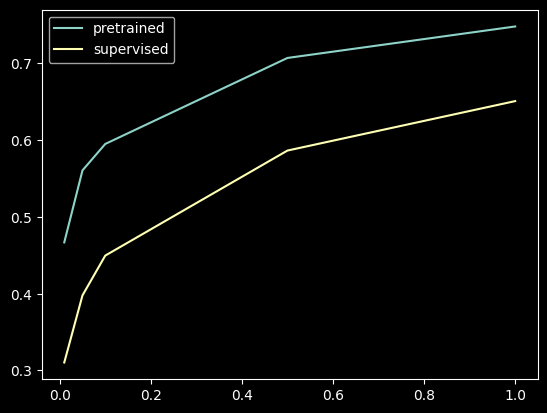

In [45]:
plt.plot(pretrained['train_size'], pretrained['accuracy'], label='pretrained')
plt.plot(supervised['train_size'], supervised['accuracy'], label='supervised')
plt.legend()